# Assignment 3: learning by gradient descent
## Base code + Extensions 1 and 2

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint
import types

In [2]:
# Load the data
xi = pd.read_csv("Data/xi.csv", delimiter=',', header=None)
tau = pd.read_csv("Data/tau.csv", delimiter=',', header=None)
D = (xi, tau) # xi = 50x5000-dim array, tau = 1x5000-dim vector with target values

In [3]:
# Implementation of a shallow feed-forward neural network
def feed_forward_nn(weight_matrix, xi):
    # weight_matrix = [w1, w2, ..., wk]
    # xi = input vector of N-dim
    # vk = 1 for k = 1,...,K
    (Ndim, Kdim) = weight_matrix.shape
    vk = np.ones(shape=(Kdim, 1))
    sigma = 0
    for k in range(Kdim):
        wk = weight_matrix[:, k]
        sigma += vk[k] * np.tanh(np.dot(wk, xi))
    return sigma

In [4]:
# Evaluation metrics
def cost_function(weight_matrix, P, Q, Dataset):
    # Computes the cost function of E (0:P examples) and E_test (P+1:P+1+Q examples)
    E_train = 0
    for mu in range(P):
        xi_mu = Dataset[0][mu]; tau_mu = Dataset[1][mu]
        sigma_mu = feed_forward_nn(weight_matrix, xi_mu)
        E_train += (sigma_mu - tau_mu)**2
    E_train /= (2*P)
    
    E_test = 0
    for mu in range(Q):
        mu_t = P + mu
        xi_mu = Dataset[0][mu_t]; tau_mu = Dataset[1][mu_t]
        sigma_mu = feed_forward_nn(weight_matrix, xi_mu)
        E_test += (sigma_mu - tau_mu)**2
    E_test /= (2*Q)
    
    return E_train, E_test

In [5]:
# Training of the neural network
def train_feed_forward_nn(Dataset, K, P, Q, t_max, eta=0.05, verbose=False):
    N_dim = len(Dataset[0][0])
    
    # Weights initialization. Each w_k vector is independently generated from the others, and should have a norm 1.
    # The v_k weights are fixed to 1, not being updated during training
    W = np.zeros(shape=(N_dim, K)); v = np.ones(shape=(K, 1))
    for k in range(K):
        w_k = rand(N_dim)
        W[:, k] = w_k / np.sqrt(np.dot(w_k, w_k)) 
    
    E_train = []; E_test = []
    for t_i in range(t_max):
        nu_vector = randint(0, P, size=P) # gets a random vector with values between 0 and P
        
        if verbose: print('# Step {} out of {}'.format(t_i + 1, t_max))
        
        if isinstance(eta, types.FunctionType):
            eta_val = eta(t_i)
        else:
            eta_val = eta
        
        for nu in nu_vector: 
            xi_nu = Dataset[0][nu]; tau_nu = Dataset[1][nu]
            sigma_nu = feed_forward_nn(W, xi_nu)
            
            diff = (sigma_nu - tau_nu) 
            for k in range(K): # updates each weight vector w_k
                w_k = W[:, k]
                grad_e_k = float(diff * v[k] * (1 - np.tanh(np.dot(w_k, xi_nu))**2)) * xi_nu
                w_k -= eta_val * grad_e_k
                W[:, k] = w_k
                
        # After performing P updates, the costs are estimated
        E_tr, E_ts = cost_function(W, P, Q, Dataset)
        E_train.append(E_tr); E_test.append(E_ts)
    
    return (W, v), (E_train, E_test)


In [6]:
# Testing of the neural network
K = 2; P = 100; Q = 200; t_max = 200; eta=0.05
(W, v), (E_train, E_test) = train_feed_forward_nn(D, K, P, Q, t_max, eta)      

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


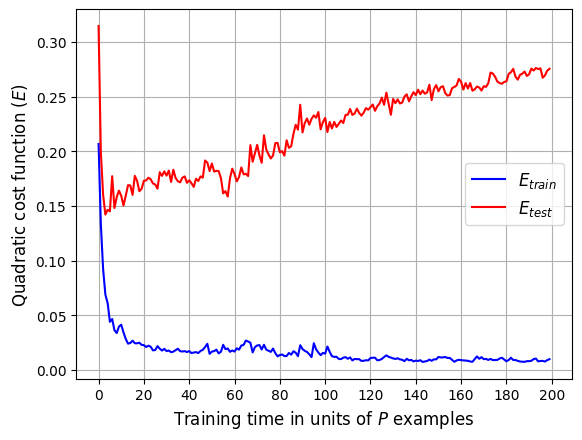

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


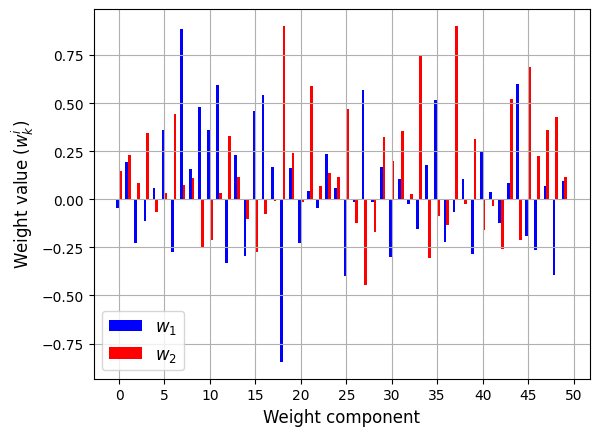

In [7]:
# Plot the final trained weight vectors and the evolution of the cost functions
fontSize = 12
def plot_costs(weight_matrix, E_train, E_test, save_path=""):
    N_dim = len(weight_matrix[:, 0]); t_max = len(E_train)
    
    t = range(t_max)
    plt.plot(t, E_train, label='$E_{train}$', color='b')
    plt.plot(t, E_test, label='$E_{test}$', color='r')
    plt.xlabel('Training time in units of $P$ examples', fontsize=fontSize)
    plt.ylabel('Quadratic cost function ($E$)', fontsize=fontSize)
    plt.xticks(range(0, t_max + 1, 20))
    plt.grid()
    plt.legend(fontsize=fontSize)
    
    if len(save_path) > 2: plt.savefig(save_path)
    
    plt.show()
    
def plot_weights(weight_matrix, bin_width=0.3, save_path=""):
    N_dim = len(weight_matrix[:, 0])


    x = np.array(range(N_dim))
    plt.bar(x - bin_width / 2, weight_matrix[:,0], width=bin_width, color='blue', label='$w_1$')
    plt.bar(x + bin_width / 2, weight_matrix[:,1], width=bin_width, color='red', label='$w_2$')
    plt.xlabel('Weight component', fontsize=fontSize)
    plt.ylabel('Weight value ($w_k^i$)', fontsize=fontSize)
    plt.xticks(range(0, N_dim + 1, 5))
    plt.grid()
    plt.legend(fontsize=fontSize)
    if len(save_path) > 2: plt.savefig(save_path)
    
    plt.show()

np.save("Data/e_train_e_test.npy", (E_train, E_test))
plot_costs(W, E_train, E_test, "Data/cost_evolution.eps")

np.save("Data/weight_matrix.npy", W)
plot_weights(W, save_path="Data/weights.eps")
 

In [8]:
(E_train[-1], E_test[-1])

(0    0.009962
 Name: 0, dtype: float64,
 0    0.275428
 Name: 100, dtype: float64)

### Bonus point 1 
The following values of P are considered: {20, 50, 200, 500, 1000, 2000}
For each value of P, Q = 2*P examples for test are considered
1. The evolution of the cost function is obtained for each P
2. The right stopping time is selected accordingly to their dynamics (finally to 20 for all of them)
3. The final training and test errors are plotted as an evolution of P

P_val: 1 out of 7


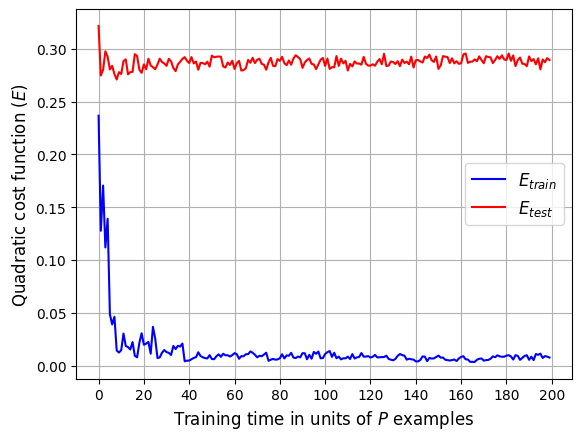

P_val: 2 out of 7


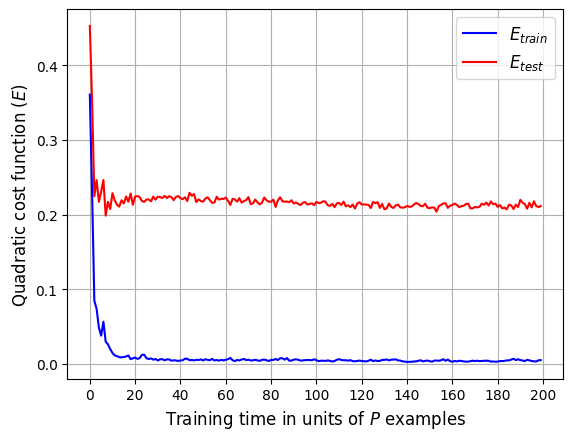

P_val: 3 out of 7


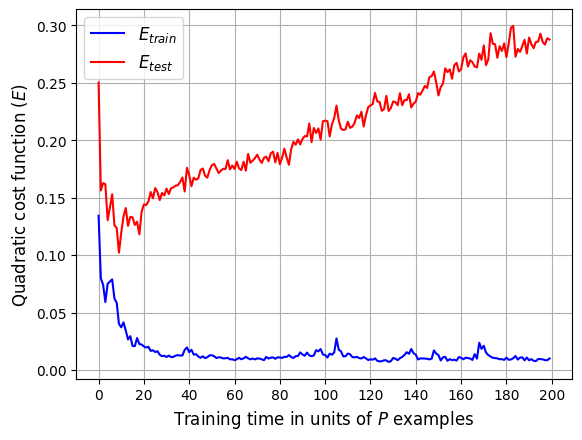

P_val: 4 out of 7


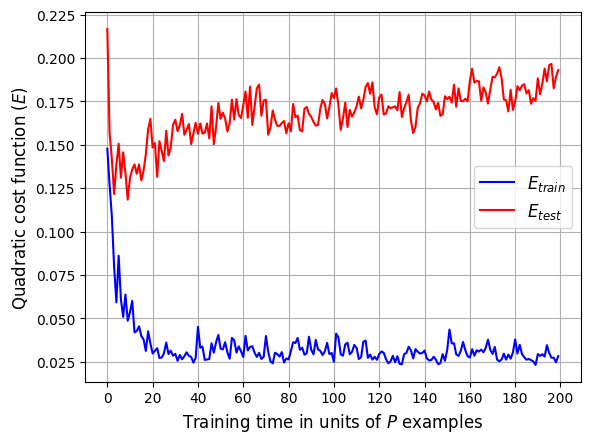

P_val: 5 out of 7


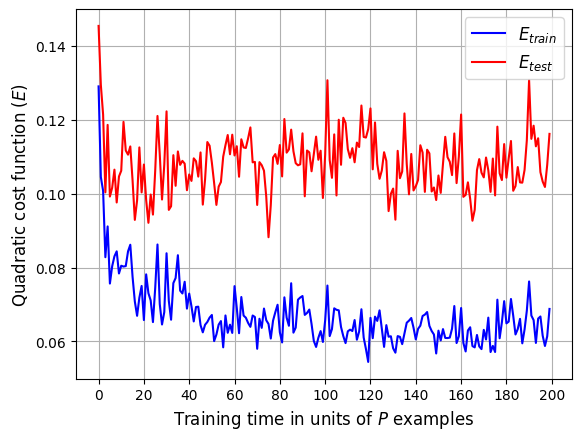

P_val: 6 out of 7


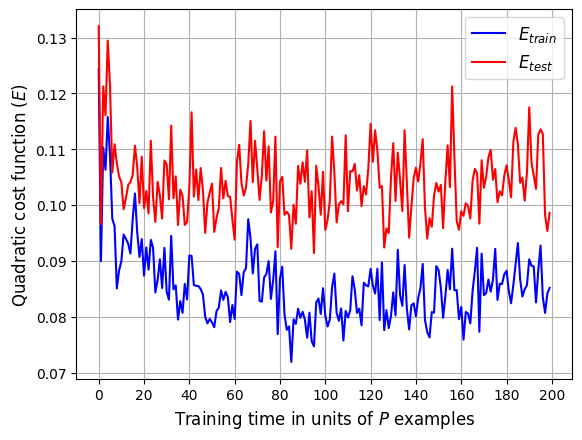

P_val: 7 out of 7


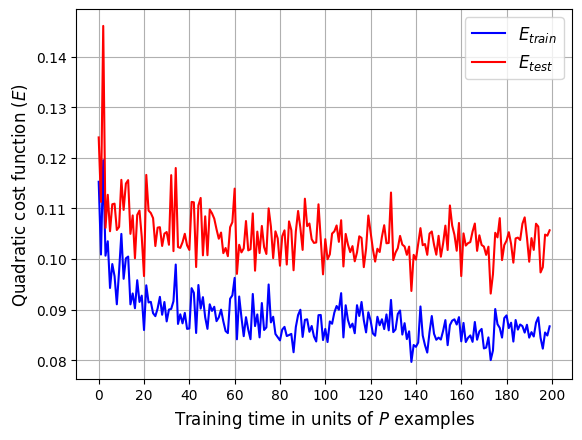

In [75]:
# Testing of the neural network - First the evolution of the cost
P_values = (20, 50, 100, 200, 500, 1000, 2000)

K = 2; eta=0.05; t_max = 200
final_E_train = []; final_E_test = []

for P_val in P_values:
    print("P_val: {} out of {}".format(P_values.index(P_val) + 1, len(P_values)))
    Q_val = 2*P_val 
    if (P_val + Q_val) > 5000:
        Q_val = 5000 - P_val
    (W_v, v_v), (E_train_v, E_test_v) = train_feed_forward_nn(D, K, P_val, Q_val, t_max, eta, verbose=False) 
    final_E_train.append(E_train_v[-1]); final_E_test.append(E_test_v[-1])
    
    plot_costs(W_v, E_train_v, E_test_v, "Data_bonus/Bonus1/P_{}.png".format(P_val))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


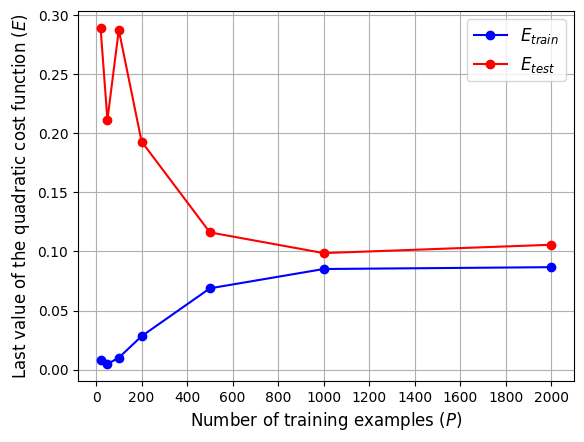

In [76]:
plt.plot(P_values, final_E_train, 'bo-', label='$E_{train}$')
plt.plot(P_values, final_E_test, 'ro-', label='$E_{test}$')
plt.xlabel('Number of training examples ($P$)', fontsize=fontSize)
plt.ylabel('Last value of the quadratic cost function ($E$)', fontsize=fontSize)
plt.grid()
plt.xticks(range(0, 2001, 200))
plt.legend(fontsize=fontSize)

np.save("Data_bonus/Bonus1/final_e.npy", (final_E_train, final_E_test))
plt.savefig("Data_bonus/Bonus1/final_e.eps")

plt.show()


In [77]:
["ii: {} -> ({:.3f}, {:.3f})".format(ii, float(final_E_train[ii]), float(final_E_test[ii])) for ii in range(len(final_E_train))]

['ii: 0 -> (0.008, 0.289)',
 'ii: 1 -> (0.005, 0.211)',
 'ii: 2 -> (0.010, 0.288)',
 'ii: 3 -> (0.028, 0.193)',
 'ii: 4 -> (0.069, 0.116)',
 'ii: 5 -> (0.085, 0.099)',
 'ii: 6 -> (0.087, 0.106)']

### Bonus point 2
Study the influence of the learning parameter eta. Different values for the learning rate are analysed and compared: {0.05, 0.1, 0.2, 0.5, 1}. Also, a time-dependent policy is studied: eta(t) = 1 / (1 + t)

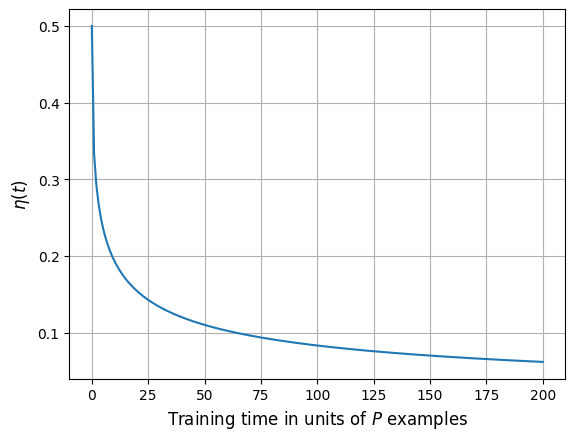

In [9]:
# Time-dependant policy of the learning rate
def eta_l(t, a=1, b=2):
    return a / (b + t**0.5)

times = range(0, 200+1)
etas = [eta_l(tt) for tt in times]
plt.plot(times, etas)
plt.xlabel('Training time in units of $P$ examples', fontsize=fontSize)
plt.ylabel('$\eta(t)$', fontsize=fontSize)
plt.grid()
# plt.xticks(range(0, 2001, 200))
# plt.legend(, fontsize=fontSize)


np.save("Data_bonus/Bonus2/eta_t.npy", (times, etas))
plt.savefig("Data_bonus/Bonus2/policy_eta.eps")

In [14]:
eta_values = [0.05, 0.1, 0.5, 1, eta_l]
K = 2; P = 100; Q = 200; t_max = 200

E_train_eta = []; E_test_eta = []

for eta_v in eta_values:
    print("Eta_it: {} out of {}".format(eta_values.index(eta_v) + 1, len(eta_values)))
    (W, v), (E_train, E_test) = train_feed_forward_nn(D, K, P, Q, t_max, eta_v)  
    E_train_eta.append(E_train); E_test_eta.append(E_test)

Eta_it: 1 out of 5
Eta_it: 2 out of 5
Eta_it: 3 out of 5
Eta_it: 4 out of 5
Eta_it: 5 out of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

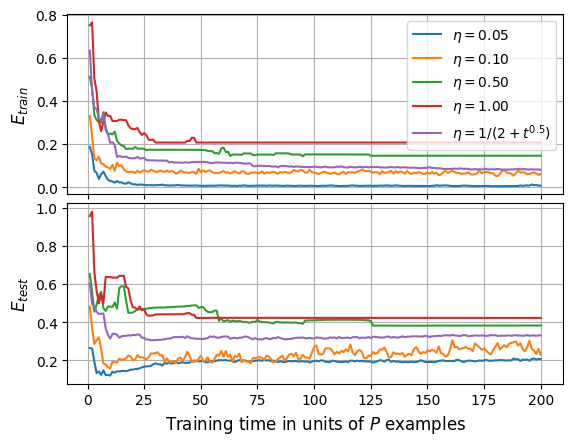

In [15]:
plt.clf()
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

labels = []
for ii in range(len(eta_values) - 1):
    labels.append('$\eta={:.2f}$'.format(eta_values[ii]))
labels.append('$\eta=1/(2 + t^{0.5})$')

for ii in range(len(E_train_eta)):
    ax1.plot(range(1, t_max+1), E_train_eta[ii], label=labels[ii])
    ax2.plot(range(1, t_max+1), E_test_eta[ii], label=labels[ii])
    
plt.subplots_adjust(hspace=.05)
# plt.plot(t, E_test, label='E_test', color='r')
ax1.set_xlabel('')
ax1.set_ylabel('$E_{train}$', fontsize=fontSize)


ax2.set_xlabel('Training time in units of $P$ examples', fontsize=fontSize)
ax2.set_ylabel('$E_{test}$', fontsize=fontSize)

ax1.grid('minor', which='both')
ax2.grid('minor', 'both')
ax1.legend(loc='upper right', fontsize=10)

np.save("Data_bonus/Bonus2/evolutions.npy", (E_train_eta, E_test_eta))
plt.savefig("Data_bonus/Bonus2/evolutions.eps")